Observations

1.) Present data clearly shows CBS as having the most positive overall sentiment visualized in both the scatter plot and the bar chart. This is further illustrated in the separated scatter plot, showing that only a few data points (tweets) had a negative compound score.

2.) Compound sentiment scores among the news sources provided change on very regular basis. The average scores from one day to the next, could change enough across the 100 most recent tweets to go from a positive overall average to a negative. To offset this level of variability, it would be necessary to pull data from a dataset larger than just the 100 most recent tweets. For example, looking at the 200 most recent tweets would give  better average over time, whereas pulling from the 20 most recent tweets would give a better idea of the sentiment for the most current events and trends happing within a period of just a few days. 

3.) As shown on both scatter plots, many tweets are categorized as neutral, or '0'. This could be the result of either the Vader Sentiment tool not being able to adequately categorize and score certain tweets, or it could be a result of the data coming from news sources as they may tend to tweet using words that are perceived as less biased or interpretive.


In [3]:
import tweepy
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Twitter API Keys
consumer_key = "rWYwPO5GujlB2DJnYxuiFXpv0"
consumer_secret = "tkqWqUDNeGNCxHAgSPzObW88YKBxfxGazD3T0XWqH9aklACNiZ"
app_key = "891138909161242624-brnipgrui4Zl2ygfbVIrwc5OwEwRGIN"
app_secret = "yajiQuWe5ux8hxU2xjgb7ZBAM6LHEzL8NnUpmgrNziAom"
#Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(app_key, app_secret)
api = tweepy.API(auth)

In [5]:
news_sources = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes']
#num_tweets = 1
sentiment = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweets = []

In [6]:
for user in news_sources:
    num_tweets = 1
    for status in tweepy.Cursor(api.user_timeline, id=user).items(100):
        tweets.append(status)
        

tweets_jsoned = ([x._json for x in tweets])
for tweet in tweets_jsoned:
    results = analyzer.polarity_scores(tweet['text'])
    compound = results["compound"]
    pos = analyzer.polarity_scores(tweet["text"])["pos"]
    neu = analyzer.polarity_scores(tweet["text"])["neu"]
    neg = analyzer.polarity_scores(tweet["text"])["neg"]

    tweets_ago = num_tweets

    tweet_text = tweet["text"]

    sentiment.append({"User" : tweet['user']['name'],
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweet Text" : tweet_text,
                            "Tweet Count" : num_tweets,
                      })
    num_tweets +=1

In [7]:
len(tweets)

500

In [8]:
sentiments_df = pd.DataFrame.from_dict(sentiment)
sentiments_newdf = sentiments_df[['User','Date','Tweet Text','Compound','Positive','Neutral','Negative', 'Tweet Count']]
sentiments_newdf.head()

,User,Date,Tweet Text,Compound,Positive,Neutral,Negative,Tweet Count
0,BBC,Wed Jun 27 16:04:05 +0000 2018,Something deadly lies beneath the ice in Icela...,-0.4215,0.0,0.741,0.259,1
1,BBC,Wed Jun 27 15:09:27 +0000 2018,🕺 *Knight Fever* \n\nBee Gee Sir Barry Gibb pa...,0.0000,0.0,1.000,0.000,2
2,BBC,Wed Jun 27 14:42:13 +0000 2018,RT @bbccomedy: Some writing advice from an exp...,0.0000,0.0,1.000,0.000,3
3,BBC,Wed Jun 27 13:05:07 +0000 2018,French butchers have written to the government...,0.0000,0.0,1.000,0.000,4
4,BBC,Wed Jun 27 11:52:00 +0000 2018,☕️ How a simple change is cutting coffee cup w...,-0.5106,0.0,0.650,0.350,5


In [9]:
sentiments_newdf.to_csv("News Mood Tweets.csv")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


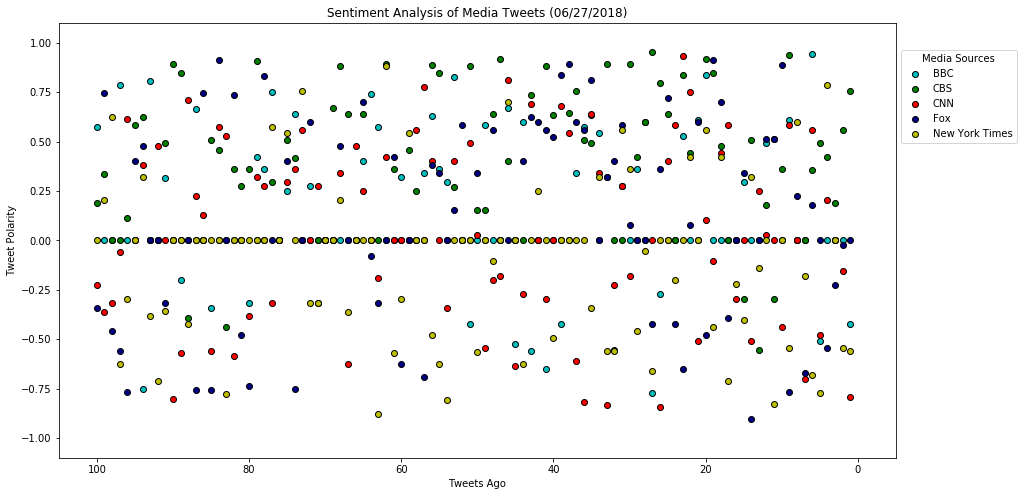

In [10]:
#info by source account
bbc = sentiments_newdf.loc[sentiments_newdf['User'] == 'BBC']
cbs = sentiments_newdf.loc[sentiments_newdf['User'] == 'CBS'].reset_index()
cnn = sentiments_newdf.loc[sentiments_newdf['User'] == 'CNN'].reset_index()
fox = sentiments_newdf.loc[sentiments_newdf['User'] == 'Fox News'].reset_index()
nyt = sentiments_newdf.loc[sentiments_newdf['User'] == 'The New York Times'].reset_index()

for tweet in bbc:
    bbc["Tweet Number"] = bbc.index + 1
for tweet in cbs:
    cbs["Tweet Number"] = cbs.index + 1
for tweet in cnn:
    cnn["Tweet Number"] = cnn.index + 1
for tweet in fox:
    fox["Tweet Number"] = fox.index + 1
for tweet in nyt:
    nyt["Tweet Number"] = nyt.index + 1

# Plotting Twitter info
plt.scatter(bbc['Tweet Number'], bbc['Compound'], c='c', edgecolor='k', label='BBC')
plt.scatter(cbs['Tweet Number'], cbs['Compound'], c='g', edgecolor='k', label='CBS')
plt.scatter(cnn['Tweet Number'], cnn['Compound'], c='r', edgecolor='k', label='CNN')
plt.scatter(fox['Tweet Number'], fox['Compound'], c='navy', edgecolor='k', label='Fox')
plt.scatter(nyt['Tweet Number'], nyt['Compound'], c='y', edgecolor='k', label='New York Times')

# Adjusting dimensions & labels
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.xlabel("Tweets Ago")
plt.xlim(105,-5)
plt.ylabel("Tweet Polarity")
plt.ylim(-1.1,1.1)
plt.legend(bbox_to_anchor=(1, 0.95), title='Media Sources', fontsize='medium')
plt.gcf().set_size_inches(15, 8)
plt.savefig("Sentiment_Analysis_Tweets.png")
plt.show()

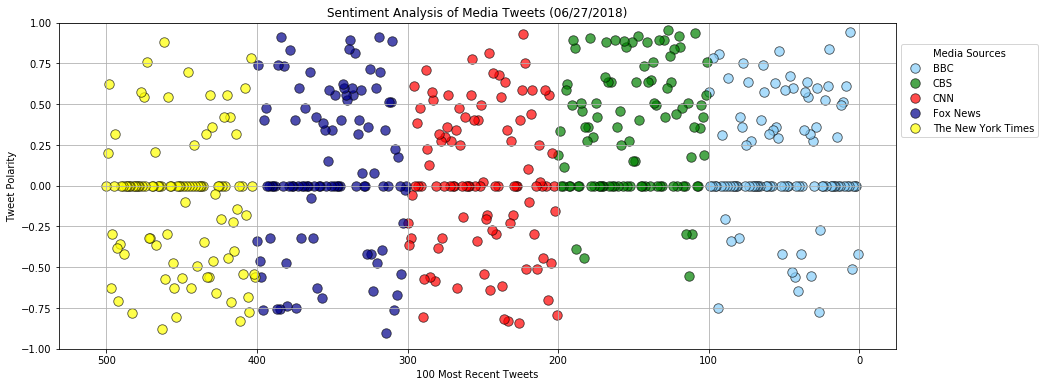

In [11]:
users = sentiments_newdf['User'].unique()
#colors = ['yellow', 'lightskyblue', 'darkblue', 'red', 'green']
colors = ['lightskyblue', 'green', 'red', 'darkblue', 'yellow']
for i in range(len(users)):
    plt.scatter(x=sentiments_newdf[sentiments_newdf['User']==users[i]]['Tweet Count'].values,
                y=sentiments_newdf[sentiments_newdf['User']==users[i]]['Compound'].values,
                s = 90,#*sentiment_df[sentiment_df['User']==users[i]]['Tweets_Ago'].values,
                c = colors[i], label = users[i],
                alpha = .7, edgecolor = 'black', linewidth = .8)

plt.xlabel("100 Most Recent Tweets")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.legend(bbox_to_anchor=(1, 0.95), title='Media Sources', fontsize='medium')
plt.grid()
plt.gcf().set_size_inches(15, 6)
plt.rcParams['axes.facecolor'] = 'gainsboro'
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.ylim(-1, 1)
plt.savefig("Sentiment_Analysis_Grouped.png")
plt.show()

In [12]:
avg_by_source=sentiments_newdf.groupby("User")["Compound"].mean()
avg_by_source

User
BBC                   0.139254
CBS                   0.342551
CNN                   0.042989
Fox News              0.101632
The New York Times   -0.089268
Name: Compound, dtype: float64

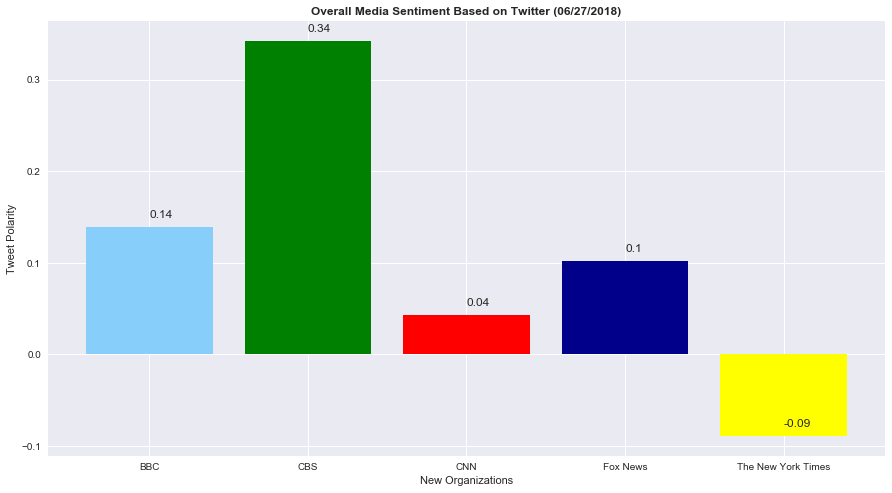

In [20]:
x_axis = np.arange(len(avg_by_source))
xlabels = avg_by_source.index
count = 0
for sentiment in avg_by_source:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
#plt.bar(x_axis, avg_by_source, tick_label = xlabels, color = ['silver', 'b', 'y', 'g', 'c'])
plt.bar(x_axis, avg_by_source, tick_label = xlabels, color = ['lightskyblue', 'green', 'red', 'darkblue', 'yellow'])
#Set title, x axis label, and y axis label.
plt.gcf().set_size_inches(15, 8)
#plt.title("Overall Sentiment of Media Tweets (11/5/2017)")
plt.title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Media Tweets")
plt.savefig("Overall Media Sentiment_Analysis.png")
plt.show()